## Step1

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import display
import pandas as pd
import numpy as np

In [2]:
money = float(input("請輸入您的戶頭金額: "))
print("若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得:",money*0.01065,"元")

請輸入您的戶頭金額: 10000000
若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得: 106500.0 元


In [3]:
I = money*0.01065 #I即為利息
print(I)

106500.0


## Step2

## [參考資料：如何爬選擇權即時報價](http://yvictor.logdown.com/posts/996770)

In [4]:
driver = webdriver.PhantomJS()

In [9]:
driver.get('http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx')

In [10]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,302.0,600.0,443.000,53.000,1,11:06:04,10250,0.2,0.3,0.300,-0.100,326,13:31:58
9,350.0,575.0,385.000,45.000,11,11:37:59,10300,0.1,0.3,0.200,-0.200,1176,13:43:35
10,203.0,495.0,369.000,79.000,36,13:43:10,10350,0.2,0.3,0.300,-0.300,3569,13:35:24
11,288.0,450.0,316.000,75.000,188,13:44:38,10400,0.4,0.5,0.400,-0.400,4651,13:43:46
12,265.0,300.0,265.000,71.000,675,13:44:29,10450,0.5,0.6,0.500,-0.800,8955,13:44:59
13,216.0,221.0,215.000,69.000,3399,13:44:29,10500,0.6,0.8,0.700,-2.600,22861,13:44:41
14,167.0,168.0,168.000,67.000,9608,13:44:46,10550,0.9,1.0,1.000,-6.300,44577,13:44:42
15,118.0,120.0,120.000,61.000,43076,13:44:54,10600,2.1,2.2,2.100,-13.900,76119,13:44:58
16,71.0,72.0,72.000,44.000,67676,13:44:58,10650,5.0,5.2,5.100,-29.900,73246,13:44:59
17,31.0,32.0,31.500,21.900,63237,13:44:59,10700,14.5,15.0,15.000,-52.000,51331,13:44:59


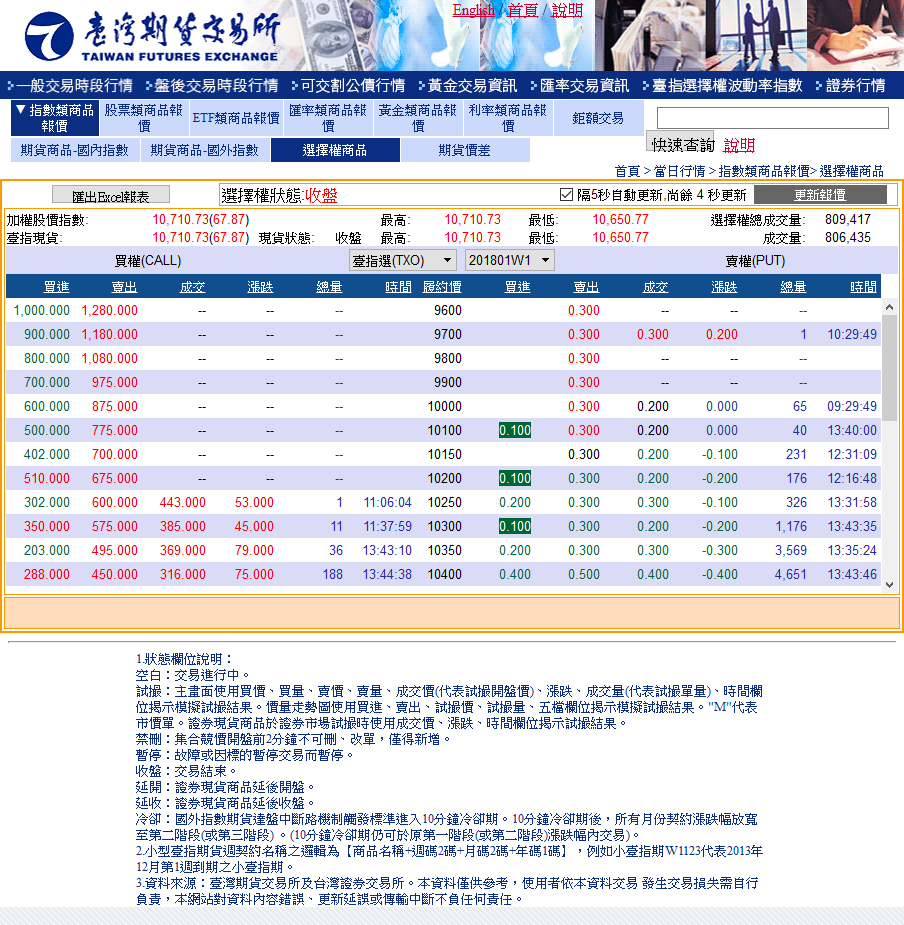

In [11]:
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [12]:
#換頁
selectbox = webdriver.support.ui.Select(driver.find_element_by_name('ctl00$ContentPlaceHolder1$ddlFusa_SelMon'))
selectbox.all_selected_options
[sel.text for sel in selectbox.options]
selectbox.select_by_value([sel.text for sel in selectbox.options][3])

In [13]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,1700.0,2000.0,--,--,--,NaN,8800,5.0,5.3,5.200,0.200,514,13:42:21
9,1600.0,1900.0,--,--,--,NaN,8900,5.9,6.1,5.800,-0.400,102,13:04:14
10,1500.0,1800.0,--,--,--,NaN,9000,7.2,7.3,7.200,0.000,32,13:09:53
11,1400.0,1700.0,--,--,--,NaN,9100,8.3,8.5,8.000,-0.600,52,10:45:16
12,1310.0,1600.0,--,--,--,NaN,9200,9.8,10.0,9.800,0.100,220,13:31:37
13,1210.0,1500.0,--,--,--,NaN,9300,5.2,12.0,11.500,-0.500,284,13:36:55
14,1110.0,1400.0,--,--,--,NaN,9400,14.5,15.0,14.500,1.000,2380,13:44:49
15,1020.0,1300.0,--,--,--,NaN,9500,17.0,17.5,17.000,0.500,14306,13:44:55
16,925.0,1200.0,--,--,--,NaN,9600,19.0,19.5,19.000,-1.500,526,13:43:50
17,830.0,1100.0,--,--,--,NaN,9700,23.0,23.5,23.000,-3.000,304,13:42:03


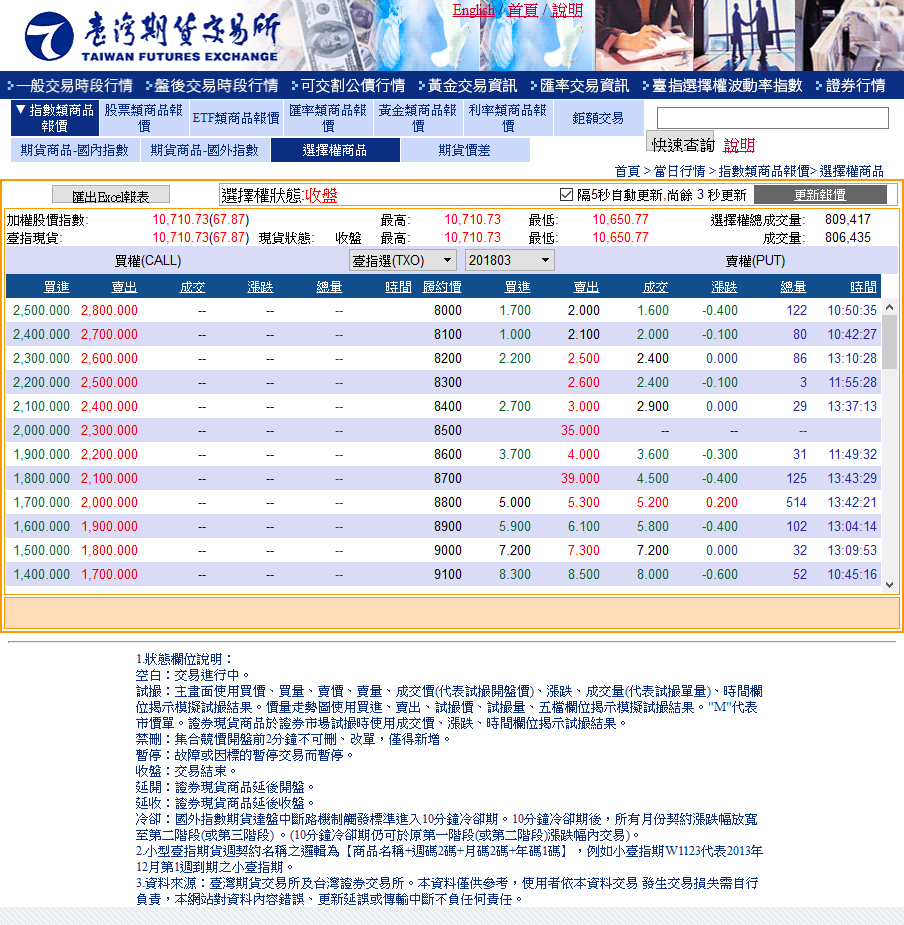

In [14]:
#利用截圖功能確認是否換頁成功
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [15]:
#將Call資料與Put資料分別放到兩個dataframe裡面
soup = BeautifulSoup(driver.page_source,"lxml")
table = pd.read_html(str(soup.select('#divDG')[0]))[0]
Call = table.loc[:,:6]
Put = table.loc[:,6:]
Call.columns = Call.loc[0]
Call = Call[1:]
Put.columns = Put.loc[0]
Put = Put[1:]
display(Call.loc[15:20],Put.loc[15:20])

,買進,賣出,成交,漲跌,總量,時間,履約價
15,1110.000,1400.000,--,--,--,NaN,9400
16,1020.000,1300.000,--,--,--,NaN,9500
17,925.000,1200.000,--,--,--,NaN,9600
18,830.000,1100.000,--,--,--,NaN,9700
19,745.000,1000.000,--,--,--,NaN,9800
20,660.000,895.000,--,--,--,NaN,9900


,履約價,買進,賣出,成交,漲跌,總量,時間
15,9400,14.500,15.000,14.500,1.000,2380,13:44:49
16,9500,17.000,17.500,17.000,0.500,14306,13:44:55
17,9600,19.000,19.500,19.000,-1.500,526,13:43:50
18,9700,23.000,23.500,23.000,-3.000,304,13:42:03
19,9800,28.000,29.000,28.500,-2.500,1162,13:44:31
20,9900,34.000,35.000,34.500,-4.000,389,13:44:23


In [16]:
def Vol_conversion(input_ele):
    if input_ele == '--':
        return 0
    if input_ele!= '--':
        return int(''.join(input_ele.split(',')))
def mon_float(input_ele):
    if input_ele == '--':
        return None
    if input_ele!= '--':
        return float(''.join(input_ele.split(',')))

In [17]:
display(Call.head(3))
Call['總量'] = Call['總量'].map(Vol_conversion)
Put['總量'] = Put['總量'].map(Vol_conversion)
Call['成交'] = Call['成交'].map(mon_float)
Put['成交'] = Put['成交'].map(mon_float)
Call['履約價']=Call['履約價'].map(lambda x:int(x))
Put['履約價']=Put['履約價'].map(lambda x:int(x))
display(Call.head(3))

,買進,賣出,成交,漲跌,總量,時間,履約價
1,2500.000,2800.000,--,--,--,NaN,8000
2,2400.000,2700.000,--,--,--,NaN,8100
3,2300.000,2600.000,--,--,--,NaN,8200


,買進,賣出,成交,漲跌,總量,時間,履約價
1,2500.000,2800.000,NaN,--,0,NaN,8000
2,2400.000,2700.000,NaN,--,0,NaN,8100
3,2300.000,2600.000,NaN,--,0,NaN,8200


In [18]:
comp = np.array(Call['履約價'].tolist())+np.array(Call['成交'].tolist())-np.array(Put['成交'].tolist())
Call['組合價'] = pd.Series(comp,index=[Call.index])
Put['組合價'] = pd.Series(comp,index=[Put.index])
pd.Series(comp,index=[Call.index])

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23    10633.0
24        NaN
25    10656.0
26    10665.0
27    10667.0
28    10664.0
29    10664.0
30    10661.0
31    10662.0
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        NaN
46        NaN
47        NaN
48        NaN
49        NaN
50        NaN
51        NaN
52        NaN
53        NaN
dtype: float64

In [19]:
def EV(Spot_price,Strike_price):
    if Spot_price-Strike_price>0:
        return Spot_price-Strike_price
    else:
        return 0

In [20]:
Call['內含價值'] = Call.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
Put['內含價值'] = Put.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
display(Call.loc[16:19],Put.loc[16:19])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值
16,1020.000,1300.000,NaN,--,0,NaN,9500,NaN,0.0
17,925.000,1200.000,NaN,--,0,NaN,9600,NaN,0.0
18,830.000,1100.000,NaN,--,0,NaN,9700,NaN,0.0
19,745.000,1000.000,NaN,--,0,NaN,9800,NaN,0.0


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值
16,9500,17.000,17.500,17.0,0.500,14306,13:44:55,NaN,0.0
17,9600,19.000,19.500,19.0,-1.500,526,13:43:50,NaN,0.0
18,9700,23.000,23.500,23.0,-3.000,304,13:42:03,NaN,0.0
19,9800,28.000,29.000,28.5,-2.500,1162,13:44:31,NaN,0.0


In [21]:
Call['時間價值'] = Call.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
Put['時間價值'] = Put.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
display(Call.loc[10:20],Put.loc[10:20])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值
10,1600.000,1900.000,NaN,--,0,NaN,8900,NaN,0.0,NaN
11,1500.000,1800.000,NaN,--,0,NaN,9000,NaN,0.0,NaN
12,1400.000,1700.000,NaN,--,0,NaN,9100,NaN,0.0,NaN
13,1310.000,1600.000,NaN,--,0,NaN,9200,NaN,0.0,NaN
14,1210.000,1500.000,NaN,--,0,NaN,9300,NaN,0.0,NaN
15,1110.000,1400.000,NaN,--,0,NaN,9400,NaN,0.0,NaN
16,1020.000,1300.000,NaN,--,0,NaN,9500,NaN,0.0,NaN
17,925.000,1200.000,NaN,--,0,NaN,9600,NaN,0.0,NaN
18,830.000,1100.000,NaN,--,0,NaN,9700,NaN,0.0,NaN
19,745.000,1000.000,NaN,--,0,NaN,9800,NaN,0.0,NaN


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值
10,8900,5.900,6.100,5.8,-0.400,102,13:04:14,NaN,0.0,5.8
11,9000,7.200,7.300,7.2,0.000,32,13:09:53,NaN,0.0,7.2
12,9100,8.300,8.500,8.0,-0.600,52,10:45:16,NaN,0.0,8.0
13,9200,9.800,10.000,9.8,0.100,220,13:31:37,NaN,0.0,9.8
14,9300,5.200,12.000,11.5,-0.500,284,13:36:55,NaN,0.0,11.5
15,9400,14.500,15.000,14.5,1.000,2380,13:44:49,NaN,0.0,14.5
16,9500,17.000,17.500,17.0,0.500,14306,13:44:55,NaN,0.0,17.0
17,9600,19.000,19.500,19.0,-1.500,526,13:43:50,NaN,0.0,19.0
18,9700,23.000,23.500,23.0,-3.000,304,13:42:03,NaN,0.0,23.0
19,9800,28.000,29.000,28.5,-2.500,1162,13:44:31,NaN,0.0,28.5


## 保證金算法

In [22]:
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx?d=080585')

In [23]:
#先抓出現貨價格
from bs4 import BeautifulSoup
import pandas as pd
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
0,臺指現貨,收盤,NaN,--,NaN,--,10710.73,67.87,0.56,--,10664.82,10710.73,10650.77,10642.86,13:31:09


In [24]:
Spot_information = pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

In [25]:
#給定期交所上的保證金A值以及B值
#賣出買權/賣出CALL : 權利金市值+MAXIMUM(A值-價外值，B值)
#賣出賣權/賣出PUT : 權利金市值+MAXIMUM(A值-價外值，B值)
A = 22000
B = 11000
S = float(Spot_information['成交價'])
spread1 = S-Call['履約價']
spread2 = Put['履約價']-S

In [26]:
Call["價外值"]=np.nan
for i in range(1,len(Call)):
    if spread1[i] > 0:
        Call["價外值"][i] = spread1[i] 
    else:
        Call["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
Call['保證金']=np.nan
for i in range (1,len(Call)):
    Call['保證金'][i] = Call['成交'][i]*50 + max(A-Call["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
Put["價外值"]=np.nan
for i in range(1,len(Put)):
    if spread2[i] > 0:
        Put["價外值"][i] = spread2[i] 
    else:
        Put["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
Put['保證金']=np.nan
for i in range (1,len(Put)):
    Put['保證金'][i] = Put['成交'][i]*50 + max(A-Put["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
#看看價平附近Call跟Put情況如何
display(Call.loc[20:30],Put.loc[20:30])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值,價外值,保證金
20,660.000,895.000,NaN,--,0,NaN,9900,NaN,0.0,NaN,810.73,NaN
21,640.000,850.000,NaN,--,0,NaN,10000,NaN,0.0,NaN,710.73,NaN
22,515.000,745.000,NaN,--,0,NaN,10100,NaN,0.0,NaN,610.73,NaN
23,505.000,590.000,500.0,31.000,5,11:44:10,10200,10633.0,433.0,67.0,510.73,46489.27
24,335.000,500.000,NaN,--,0,NaN,10300,NaN,0.0,NaN,410.73,NaN
25,373.000,378.000,363.0,43.000,42,13:25:13,10400,10656.0,256.0,107.0,310.73,39839.27
26,296.000,408.000,302.0,40.000,243,13:44:00,10500,10665.0,165.0,137.0,210.73,36889.27
27,237.000,327.000,237.0,39.000,57,13:44:45,10600,10667.0,67.0,170.0,110.73,33739.27
28,174.000,188.000,179.0,34.000,44,13:41:34,10700,10664.0,0.0,179.0,10.73,30939.27
29,128.000,135.000,127.0,24.000,1674,13:44:58,10800,10664.0,0.0,127.0,0.00,28350.00


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值,價外值,保證金
20,9900,34.000,35.000,34.5,-4.000,389,13:44:23,NaN,0.0,34.5,0.00,23725.00
21,10000,42.500,43.000,41.0,-8.000,1429,13:44:58,NaN,0.0,41.0,0.00,24050.00
22,10100,52.000,54.000,52.0,-9.000,589,13:44:33,NaN,0.0,52.0,0.00,24600.00
23,10200,65.000,68.000,67.0,-13.000,1347,13:44:57,10633.0,433.0,-366.0,0.00,25350.00
24,10300,81.000,85.000,84.0,-19.000,188,13:44:19,NaN,0.0,84.0,0.00,26200.00
25,10400,107.000,110.000,107.0,-19.000,231,13:43:35,10656.0,256.0,-149.0,0.00,27350.00
26,10500,89.000,138.000,137.0,-31.000,297,13:44:03,10665.0,165.0,-28.0,0.00,28850.00
27,10600,150.000,180.000,170.0,-33.000,64,13:44:35,10667.0,67.0,103.0,0.00,30500.00
28,10700,147.000,318.000,215.0,-41.000,16,13:42:39,10664.0,0.0,215.0,0.00,32750.00
29,10800,201.000,379.000,263.0,-44.000,274,13:44:55,10664.0,0.0,263.0,89.27,35060.73
